In [48]:
%matplotlib inline

In [49]:
import pandas as pd
from pylab import *
import seaborn as sns
import matplotlib.patches as mpatches

In [50]:
#load tables 
batting_reg = pd.DataFrame.from_csv('Desktop/baseball/batting.csv', index_col = None, encoding = 'utf-8')
pitching_reg = pd.DataFrame.from_csv('Desktop/baseball/pitching.csv', index_col = None, encoding = 'utf-8')
player = pd.DataFrame.from_csv('Desktop/baseball/player.csv', index_col = None, encoding = 'utf-8')

In [124]:
#Cleaning up PLayer info
player_name = player[['player_id', 'name_first', 'name_last', 'birth_year']]
player_name = player_name[pd.notnull(player_name['birth_year'])]
player_name['birth_year'] = player_name['birth_year'].astype('int')
player_name.set_index('player_id').head()

,name_first,name_last,birth_year
player_id,,,
aardsda01,David,Aardsma,1981
aaronha01,Hank,Aaron,1934
aaronto01,Tommie,Aaron,1939
aasedo01,Don,Aase,1954
abadan01,Andy,Abad,1972


In [141]:
#Hitters' age
batting = batting_reg[['player_id', 'year']]
batting['year'] = batting['year'].astype('int')
batting.set_index('player_id')
batting_age = pd.merge(batting, player_name, on = 'player_id')
batting_age['age'] = batting_age['year'] - batting_age['birth_year']
batting_age.head()

C:\Users\lawew\OneDrive\Documents\New folder\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,player_id,year,name_first,name_last,birth_year,age
0,abercda01,1871,Frank,Abercrombie,1850,21
1,addybo01,1871,Bob,Addy,1842,29
2,addybo01,1873,Bob,Addy,1842,31
3,addybo01,1873,Bob,Addy,1842,31
4,addybo01,1874,Bob,Addy,1842,32


In [143]:
#pitching age
pitching = pitching_reg[['player_id', 'year']]
pitching['year'] = pitching['year'].astype('int')
pitching.set_index('player_id')
pitching_age = pd.merge(pitching, player_name, on = 'player_id')
pitching_age['age'] = pitching_age['year'] - pitching_age['birth_year']
pitching_age.head()

C:\Users\lawew\OneDrive\Documents\New folder\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,player_id,year,name_first,name_last,birth_year,age
0,bechtge01,1871,George,Bechtel,1848,23
1,bechtge01,1873,George,Bechtel,1848,25
2,bechtge01,1874,George,Bechtel,1848,26
3,bechtge01,1875,George,Bechtel,1848,27
4,bechtge01,1875,George,Bechtel,1848,27


KeyError: 'year'

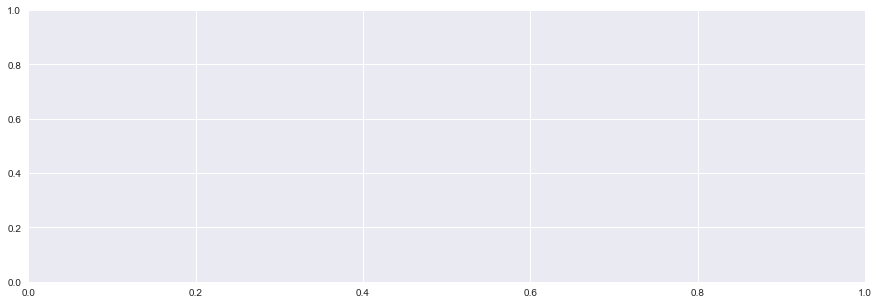

In [187]:
fig = plt.figure(figsize=(8,4), dpi=100)
fig, axes = plt.subplots(figsize = (15, 5))

avg_age = batting_age.groupby('year')['age'].mean().to_frame()
avg_age.columns = ['avg_age']
#avg_age.head()
plt.bar(avg_age['year'], avg_age['avg_age'])